<a href="https://colab.research.google.com/github/Zeinayyy/Zeinayyy/blob/main/Testing_Backpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install NeuralProphet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 4.2 MB/s 
     |████████████████████████████████| 232 kB 27.4 MB/s 
     |████████████████████████████████| 706 kB 61.8 MB/s 
     |████████████████████████████████| 419 kB 55.8 MB/s 
     |████████████████████████████████| 1.4 MB 39.2 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 
     |████████████████████████████████| 1.6 MB 40.9 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/Matlab/Folder tanpa nama/dataset.csv')
dt.head()

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


In [ ]:
dt.columns

Index(['dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'rain_6h', 'rain_12h', 'rain_24h', 'rain_today', 'snow_1h',
       'snow_3h', 'snow_6h', 'snow_12h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [ ]:
dt.dtypes

dt_iso                 datetime64[ns]
timezone                        int64
city_name                      object
lat                           float64
lon                           float64
temp                          float64
temp_min                      float64
temp_max                      float64
pressure                      float64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
rain_1h                       float64
rain_3h                       float64
rain_6h                       float64
rain_12h                      float64
rain_24h                      float64
rain_today                    float64
snow_1h                       float64
snow_3h                       float64
snow_6h                       float64
snow_12h                      float64
snow_24h                      float64
snow_today                    float64
clouds_all                      int64
weather_id                      int64
weather_main

In [ ]:
dt['dt_iso'] = pd.to_datetime(dt['dt_iso'])

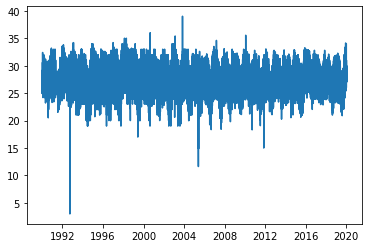

In [ ]:
plt.plot(dt['dt_iso'], dt['temp'])

In [ ]:
hjn = dt[dt['weather_main'] == 'Rain']
hjn.head()

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1990-01-01 00:00:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1990-01-01 01:00:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1990-01-01 02:00:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1990-01-01 03:00:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
7,1990-01-01 07:00:00,28800,Denpasar,-8.652497,115.219117,27.29,27.29,27.29,1008.0,82,...,NaN,NaN,NaN,NaN,NaN,71,500,Rain,light rain,10d


In [ ]:
hjn['Year'] = hjn['dt_iso'].apply(lambda x: x.year)
hjn = hjn[hjn['Year']>=2010]

WARNING - (py.warnings._showwarnmsg) - <ipython-input-12-aa5fe7f4f6f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hjn['Year'] = hjn['dt_iso'].apply(lambda x: x.year)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hjn['Year'] = hjn['dt_iso'].apply(lambda x: x.year)



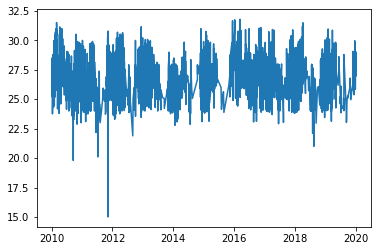

In [ ]:
plt.plot(hjn['dt_iso'], hjn['temp'])

In [ ]:
hjn.head()

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,...,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon,Year
176223,2010-01-01 15:00:00,28800,Denpasar,-8.652497,115.219117,28.20,28.0,28.4,1008.4,85,...,NaN,NaN,NaN,NaN,40,500,Rain,light rain,10n,2010
176225,2010-01-01 17:00:00,28800,Denpasar,-8.652497,115.219117,26.50,26.0,27.0,1009.1,94,...,NaN,NaN,NaN,NaN,75,501,Rain,moderate rain,10n,2010
176226,2010-01-01 18:00:00,28800,Denpasar,-8.652497,115.219117,27.00,27.0,27.0,1007.7,92,...,NaN,NaN,NaN,NaN,40,501,Rain,moderate rain,10n,2010
176227,2010-01-01 19:00:00,28800,Denpasar,-8.652497,115.219117,27.00,27.0,27.0,1007.7,92,...,NaN,NaN,NaN,NaN,40,501,Rain,moderate rain,10n,2010
176278,2010-01-03 22:00:00,28800,Denpasar,-8.652497,115.219117,27.24,27.0,27.4,1009.1,88,...,NaN,NaN,NaN,NaN,75,501,Rain,moderate rain,10n,2010


In [ ]:
data = hjn[['dt_iso', 'temp']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
176223,2010-01-01 15:00:00,28.20
176225,2010-01-01 17:00:00,26.50
176226,2010-01-01 18:00:00,27.00
176227,2010-01-01 19:00:00,27.00
176278,2010-01-03 22:00:00,27.24


In [ ]:
fix = data.drop_duplicates()

In [ ]:
m = NeuralProphet()
m.fit(fix, freq="D", epochs=1000)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 76.496% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 76.496% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")

  warnings.warn("Can't initialize NVML")

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")

  warnings.w

Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,25.014397,29.473099,0.992827,0.0,0
1,20.096758,24.046816,0.736308,0.0,1
2,15.610328,18.976723,0.509292,0.0,2
3,11.582674,14.447280,0.320944,0.0,3
4,8.380076,10.871638,0.189280,0.0,4
...,...,...,...,...,...
995,0.930638,1.156695,0.002544,0.0,995
996,0.930242,1.156654,0.002543,0.0,996
997,0.930196,1.157236,0.002544,0.0,997
998,0.930358,1.156610,0.002544,0.0,998


In [ ]:
masdep = m.make_future_dataframe(fix, periods=1000)
ramal = m.predict(masdep)
ramal.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 76.496% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 76.496% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency i

Predicting: 302it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
995,2022-09-29 17:00:00,None,26.843433,27.529325,-0.068465,0.001173,-0.618599
996,2022-09-30 17:00:00,None,26.959293,27.530010,-0.026381,0.074264,-0.618599
997,2022-10-01 17:00:00,None,26.834431,27.530693,0.013937,-0.091601,-0.618599
998,2022-10-02 17:00:00,None,27.038496,27.531376,0.052395,0.073324,-0.618599
999,2022-10-03 17:00:00,None,26.889748,27.532059,0.088909,-0.112621,-0.618599


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


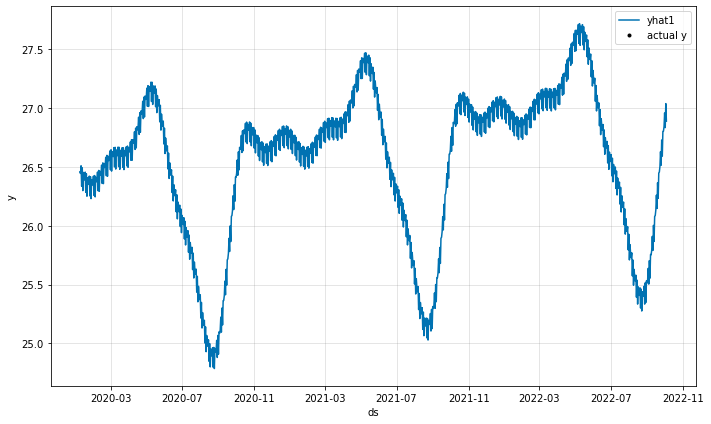

In [ ]:
plot1 = m.plot(ramal)